# Assignment 1

## Group 32

*  Prerak Gupta -
*  Chen Zhiyue -
*  Jonathan Narvaez - 03708467
*  Hao Ma - 03721529
*  S - 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Curse of Dimensionality

### Task 1

Let $\mathit{C}_d = \{\mathit{x}\in \mathbb{R}^p\mid\|\mathit{x}\|_\infty\leq\frac{d}{2}\}$ denote the $\mathit{p}$-dimensional hypercube of edge length $\mathit{d}$, centered at the orign.

* Assume $\mathit{X}$ to be uniformly distributed in $\mathit{C}_1$. Determine $\mathit{d}$ in dependence of $\mathit{p}$ and $\mathit{q}\in[0, 1]$, such that
$$Pr(\mathit{X}\in\mathit{C}_d)=q$$
holds.

* Let the components of the $\mathit{p}$-dimensional random variable $\mathit{X}^p$ be independent and have the standard normal distribution. It is known that $Pr(|\mathit{X}^1|\leq2.576)=0.99$. For an arbitrary $\mathit{p}$, determine the probability $Pr(\|\mathit{X}^p\|_\infty\gt2.576)$ for any of the components of $\mathit{X}^p$ to lie outside of the interval $[-2.576, 2.576]$. Evaluate the value for $\mathit{p} = 2$, $\mathit{p} = 3$ and $\mathit{p} = 500$.

$$
\begin{align*}
& \text{For,} \quad Pr(|\mathit{X}^1| \leq 2.576) = 0.99 &\\
& \text{Where,} \quad Pr(\|\mathit{X}^p\| \leq 2.576) &\\
& (\|\mathit{X}^p\|_\infty \gt 2.576) = 1 - Pr(\|\mathit{X}^p\| \leq 2.576) &\\
\\
& \text{Since,} \quad \mathit{X}^p_i \text{ where } \mathit{i} \in [1,p] \text{ is i.i.d, } \quad Pr(||\mathit{X}^p||_\infty \le 2.576)=\prod_1^p Pr(|\mathit{X}^p_i| \le 2.576)=0.99^p &\\
& \text{Therefore,} \quad Pr(\|\mathit{X}^p\|_\infty\gt 2.576) = 1 - (0.99)^p &\\
\\
& \text{For, } \mathit{P}=2 \quad Pr(||X^p||_\infty \gt 2.576)=1-0.99^2=0.0199 &\\
& \text{For, } \mathit{P}=3 \quad Pr(||X^p||_\infty \gt 2.576)=1-0.99^2=0.0297 &\\
& \text{For, } \mathit{P}=500 \quad Pr(||X^p||_\infty \gt 2.576)=1-0.99^{500}=0.9934 &\\
\end{align*}
$$

### Task 2

Provide the PYTHON code to the following tasks (the code needs to be commented properly):

* Sample 100 uniformly distributed random vectors from the box  $[-1, 1]^{d}$ for $\mathit{p} = 2$.

[[-1.29005804e-01  5.53775165e-01]
 [ 1.79396870e-01 -5.10153556e-01]
 [ 3.63503076e-01 -8.52993794e-01]
 [-2.89137423e-01  4.79879543e-01]
 [ 7.57813679e-01  1.97236411e-01]
 [-2.81444070e-01  9.80187801e-01]
 [-6.69838789e-01  7.49774108e-01]
 [-3.98146649e-01  6.80438607e-01]
 [-8.27690187e-01  2.85177014e-01]
 [ 3.76639660e-01 -1.86465788e-01]
 [ 9.39259602e-01 -4.19819457e-01]
 [ 2.52101602e-01  9.87031501e-01]
 [-8.48789293e-01  2.06520593e-01]
 [-2.97845613e-01 -8.59361047e-01]
 [ 7.76979187e-02 -5.15469998e-01]
 [ 6.40038348e-01  9.48313507e-01]
 [-3.21071366e-01  9.08274463e-01]
 [-9.16323308e-01 -4.99269670e-01]
 [-9.68369121e-01  9.30062155e-01]
 [-4.40666185e-01 -9.28940150e-01]
 [-2.55025633e-02 -4.91747057e-01]
 [ 8.10190167e-01 -4.09812543e-01]
 [-6.58852202e-01 -1.11591263e-01]
 [ 3.58212673e-01 -2.66395699e-01]
 [-8.45663922e-01  7.38637067e-01]
 [ 9.44840527e-03  7.54006758e-01]
 [-9.05188070e-01 -6.12202897e-01]
 [-3.50530959e-01 -4.13010728e-01]
 [ 6.32847187e-01 -5

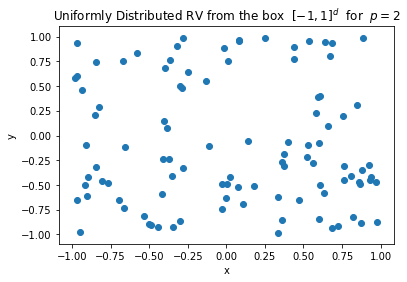

In [3]:
def ud_sample(b1, b2, n, d): 
# Returns uniformly distributed sample size n and d dimension
# b1, b2 limits of the box [-1,1]^d
    sample = np.random.uniform(b1, b2, [n, d])
    return sample

x = ud_sample(-1, 1, 100, 2)

# Scatter plot sample
plt.title('Uniformly Distributed RV from the box  $[−1,1]^d$  for  $p=2$')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x[:, 0], x[:, 1])
print(x)

* For each of the 100 vectors determine the minimum angle to all other vectors. Then compute the average of these minimum angles. Note that for two vectors
$\mathit{x}, \mathit{y}$ the cosine of the angle between the two vectors is defined as
$$\cos{((\mathit{x}, \mathit{y}))} = \frac{\langle \mathit{x}, \mathit{y} \rangle}{\|\mathit{x}\|\|\mathit{y}\|}.$$

In [4]:
def angle(x, y): # Return angle between vextors (x, y), using the provided formula
    if np.array_equal(x, y): # Check if both vectors have the same shape and elements
        return 0
    angle = np.arccos(np.dot(x, y) / (np.sqrt(x.dot(x)) * np.sqrt(y.dot(y))))
    return angle

def avm_angle(x): #Return average angle between 2 vectors. 
    n, d = x.shape 
    m_angle = np.zeros(n)
    
    for i, a in enumerate(x):
#        for j, b in enumerate(x):
#            if j!= i:
#                m_angle[i] = min([angle(a,b)])
            m_angle[i] = min([angle(a, b) \
                           for j, b in enumerate(x) if j!=i])
    return np.average(m_angle)

avm_angle(x)

0.027039395775553633

* Repeat the above for dimensions $\mathit{d} = 1, ..., 1000$ and use the results to plot the average minimum angle against the dimension.

In [ ]:
d = np.arange(1,1001)
x_out = np.zeros((1000,1))

for di in d:
    x = ud_sample(-1, 1, 1000, di)
    x_out[di-1] = avm_angle(x)
    
print(x_out)

# plot the average minimum angle against the dimension
plt.title('the average minimum angle against the dimension')
plt.xlabel('d')
plt.ylabel('average min')
plt.scatter(d, x_out)


* Give an interpretation of the result. What conclusions can you draw for 2 randomly sampled vectors in a $\mathit{d}$-dimensional space?

1


* Does the result change if the sample size increases?

## Statistical Decision Making

### Task 3

Answer the following questions. All answers must be justified.

* The numbers in Figure 1 show the probability of the respective event to happen (e.g. the probability for the event $\mathit{X} = 1$ and $\mathit{Y} = 1$ is 0.02). Is this table a
probability table? If so, why?

In [ ]:
This table is a probability table. Because the sum of all the probabilities is 1.

* Based on Figure 1 give the conditional expectation $\mathbb{E}_{Y \mid X=2}[\mathit{Y}]$ and the probability of the event $\mathit{X}=1$ under the condition that $\mathit{Y}=3$.

In [84]:
# joint probability table
p_table = np.array([[0.4, 0.14, 0.05],[0.02,0.26,0.13]])

# 1st row corresponds to y,
# 2nd row corresponds to x.
#X = np.array([[1, 2, 3, 1, 2, 3],
#             [2, 2, 2, 1, 1, 1]])

# marginal probabilities: sum accross rows
p_x = np.sum(p_table,axis=1)
p_y = np.sum(p_table,axis=0)

# expected value of Y under x=2
p_ycondxequals2 = p_table[0,:]/p_x[0]
y = np.array([1,2,3])
E_y = np.dot(p_ycondxequals2,y)
print('Expected value of y under x=2: {}'.format(E_y))

# conditional  p(x = 1 | y = 3)
# p(A|B) = p(A \intersect B) / p(B)
p_xequals1condyequals3 = p_table[1,2] / p_y[2]
print('p(x=1 | y=3) = {}'.format(p_xequals1condyequals3))



Expected value of y under x=2: 1.4067796610169492
p(x=1 | y=3) = 0.7222222222222223


* Is the function $\mathit{p}(\mathit{X}, \mathit{Y})$ given by
$$
\mathit{p}(\mathit{X}, \mathit{Y}) = \begin{cases}
1 & \quad \text{for } 0\leq \mathit{x}\leq 1\text{, } 0\leq \mathit{y}\leq \frac{1}{2} \\
0 & \quad \text{otherwise} \end{cases}
$$
a joint density function for two random variables?

No. It is not a joint density function.

$\int^{1}_0 \int^{\frac{1}{2}}_0 p(X,Y)dxdy \neq 1$

* For two random variables $\mathit{X}$ and $\mathit{Y}$ the joint density function is given by
$$
\mathit{p}(\mathit{x}, \mathit{y}) = \begin{cases}
2\mathit{e}^{-(x+y)} & \quad \text{for } 0\leq \mathit{x}\leq \mathit{y}\text{, } 0\leq \mathit{y} \\
0 & \quad \text{otherwise.} \end{cases}
$$
What are the marginal density functions for $\mathit{X}$ and $\mathit{Y}$ respectively?

   The marginal density functions for X
   
   $p(x) = \int^{\infty}_x p(x,y)dy = \int^{\infty}_x 2e^{-(x+y)}dy = 2e^{-2x}$
   
   The marginal density functions for Y
  
   $p(y) = \int^{y}_0 p(x,y)dx = \int^{y}_0 2e^{-(x+y)}dx = 2(e^{-y}-e^{-2y})$

* Let the joint density function of two random variables $\mathit{X}$ and $\mathit{Y}$ be given by
$$
\mathit{p}(\mathit{x}, \mathit{y}) = \begin{cases}
\frac{1}{15}(2\mathit{x}+4\mathit{y}) & \quad \text{for } 0\leq \mathit{x}\leq 3\text{, } 0\leq \mathit{y}\leq 1 \\
0 & \quad \text{otherwise.} \end{cases}
$$
Determine the probability for $\mathit{X}\leq 2$ under the condition that $\mathit{Y} = \frac{1}{2}$.

   The marginal density functions for Y
  
   $p(y) = \int^{3}_0 p(x,y)dx = \int^{3}_0 \frac{1}{15}(2x+4y)dx = \frac{3}{5}+\frac{4}{5}y$
   
   The conditional probability for x under y
   
   $p(x\mid y) = \frac{p(x,y)}{p(y)} = \begin{cases} \frac{2x+4y}{9+12y} & \quad \text{for }0\leq \mathit{x}\leq 3\text{, } 0\leq \mathit{y}\leq 1 \\ 0 & \quad \text{otherwise.} \end{cases}$
   
   $p(x\mid y=\frac{1}{2}) = \begin{cases} \frac{2}{15}(x+1) & \quad \text{for }0\leq \mathit{x}\leq 3 \\ 0 & \quad \text{otherwise.} \end{cases}$
   
   
   The probability for $\mathit{X}\leq 2$ under the condition that $\mathit{Y} = \frac{1}{2}$
   
   
   $p(\mathit{X}\leq 2\mid\mathit{Y}=\frac{1}{2}) = \int^2_0 p(x\mid y=\frac{1}{2})dx = \frac{8}{15}$

Show that the covariance matrix $\mathit{C}$ of any random variable $\mathit{X}\in\mathbb{R}^p$ is symmetric positive semidefinite, i.e. $\mathit{C}=\mathit{C}^T$ and $\mathit{x}^T\mathit{Cx}\geq 0$ for any covariance matrix $\mathit{C}\in\mathbb{R}^{p\times p}$ and any $\mathit{x}\in\mathbb{R}^p$.

* $\mathit{C}=\mathit{C}^T$
$$
\begin{align*}
& \mathit{C} = \mathbb{E}[(\mathit{X}-\mathit{\mu})(\mathit{X}-\mathit{\mu})^T] &\\
& \mathit{C} = \mathbb{E}[(\mathit{X}-\mathit{\mu})(\mathit{X}^T-\mathit{\mu}^T)] &\\
& \mathit{C} = \mathbb{E}(\mathit{XX}^T-\mathit{X\mu}^T-\mathit{\mu X}^T+\mathit{\mu\mu}^T) &\\
& \mathit{C} = \mathbb{E}(\mathit{XX}^T)-\mathbb{E}(\mathit{X\mu}^T)-\mathbb{E}(\mathit{\mu X}^T)+\mathbb{E}(\mathit{\mu\mu}^T) &\\
& \mathit{C} = \mathbb{E}(\mathit{XX}^T)-\mathbb{E}(\mathit{X})\mathit{\mu}^T-\mathit{\mu}\mathbb{E}(\mathit{X}^T)+\mathit{\mu\mu}^T &\\
& \mathit{C} = \mathbb{E}(\mathit{XX}^T)-\mathit{\mu\mu}^T-\mathit{\mu\mu}^T+\mathit{\mu\mu}^T &\\
& \mathit{C} = \mathbb{E}(\mathit{XX}^T)-\mathit{\mu\mu}^T &\\
\\
& \mathit{C}^T = \mathbb{E}(\mathit{XX}^T)^T-(\mathit{\mu\mu}^T)^T &\\
& \mathit{C}^T = \mathbb{E}((\mathit{X}^T)^T(\mathit{X})^T)-(\mathit{\mu}^T)^T(\mathit{\mu})^T &\\
& \mathit{C}^T = \mathbb{E}(\mathit{X}\mathit{X}^T)-\mathit{\mu}\mathit{\mu}^T &\\
& \mathit{C}^T = \mathit{C} &\\
\end{align*}
$$

* $\mathit{x}^T\mathit{Cx}\geq 0$
$$
\begin{align*}
& \mathit{C} = \mathbb{E}[(\mathit{X}-\mathit{\mu})(\mathit{X}-\mathit{\mu})^T] &\\
\\
& \mathit{x}^T\mathit{Cx} = \mathit{x}^T\mathbb{E}[(\mathit{X}-\mathit{\mu})(\mathit{X}-\mathit{\mu})^T]\mathit{x} &\\
& \mathit{x}^T\mathit{Cx} = \mathbb{E}(\mathit{x}^T(\mathit{X}-\mathit{\mu})(\mathit{X}-\mathit{\mu})^T\mathit{x}) &\\
& \mathit{x}^T\mathit{Cx} = \mathbb{E}((\mathit{x}^T(\mathit{X}-\mathit{\mu}))(\mathit{x}(\mathit{X}-\mathit{\mu}))^T) &\\
& \mathit{x}^T\mathit{Cx} = \mathbb{E}(YY^T) &\\
& \mathit{x}^T\mathit{Cx} = \mathbb{E}(Y^2) &\\
& \mathit{x}^T\mathit{Cx} \geq 0 &\\
\end{align*}
$$